# **Chapter 8 이미지 다루기**

## **8.1 이미지 로드하기**



In [ ]:
# 라이브러리를 임포트
import cv2
cv2.__version__

'4.1.2'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Google colab에 데이터 로딩하기

In [ ]:
# (1) local folder에서 colab으로 파일 로딩

from google.colab import files
uploaded = files.upload()

Saving plane.jpg to plane.jpg


In [ ]:
# (2) Google drive를 colab에 연결해서 데이터 로딩

from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

## 전처리를 위해 이미지 로드하기

> OpenCv의 imread를 사용한다.
*   imread(file_name, flag)

-> 이미지를 읽어 Numpy 객체로 만드는 함수

-> file_name : 이미지 파일, flag : 이미지 읽는 방법


---




*   IMREAD_COLOR : 이미지를 Color로 읽고, 투명한 부분은 무시
*   IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽기
*   IMREAD_UNCHANGED : 이미지를 Color로 읽고, 투명한 부분도 읽기 (alpha)

-> 반환 값 : Numpy 객체 (행, 열 색상 : 기본 BGR)








## 이미지 출력하기


> imshow(title,image)

-> 특정한 이미지를 화면에 출력

-> title 윈도우 창의 제목 , image 출력할 이미지 객체


---


colab의 경우 윈도우 창에 이미지 띄우는 게 불가능해서 matplotlib 이용한다

In [ ]:
# 이미지 로드하기
image_gry=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE) #흑백
image_bgr=cv2.imread("plane.jpg",cv2.IMREAD_COLOR) #컬러

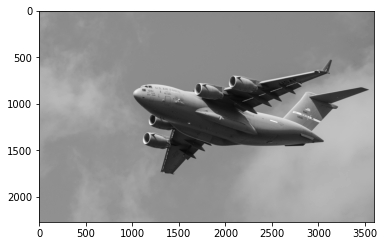

In [ ]:
#  흑백 이미지 출력하기
plt.imshow(image_gry, cmap="gray"), plt.axis("on")
plt.show()

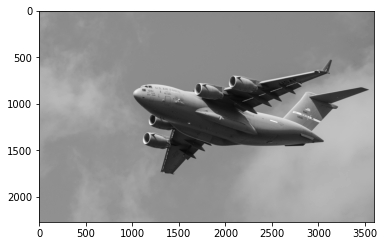

In [ ]:
# (2) 의 방법으로 로딩했을 경우 copy한 경로 넣어준다.
image_gry=cv2.imread("/content/drive/MyDrive/plane.jpg",cv2.IMREAD_GRAYSCALE)

plt.imshow(image_gry, cmap="gray"), plt.axis("on")
plt.show()



>  plt.axis()

>  (x, y)축에 관한 옵션을 다루는 메소드
 
*   plt.axis('on') - 축과 이름들을 보여줌 / 원래 보여주기에 쓸 필요없는 기능


*   plt.axis('off') - 축과 이름들을 제거 
*   plt.axis('equal') -  x축과 y축의 비율을 실제 똑같은 비율로 나오게하는 메소드 
*   plt.axis('scaled') - x축과 y축의 비율을 실제 똑같은 비율로 나오게하는  메소드, 그리고 여백을 축소함
*   plt.axis('tight')  -모든 자료가 보이도록 축 범위를 조밀하게 조정
*   plt.axis('image')  - 모든 자료가 보이도록 축 범위를 자료를 구한 값으로 조정한다




<function matplotlib.pyplot.show>

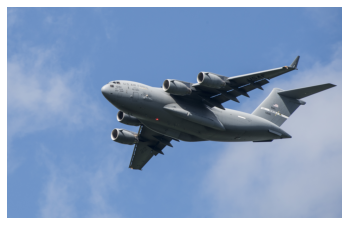

In [ ]:
# 컬러 이미지 출력을 위해 RGB로 변환
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BAYER_BG2RGB)

# 컬러 이미지 출력
plt.imshow(image_rgb), plt.axis("off")
plt.show

 *   OpenCV는 BGR을 기준으로 하며, Matplotlib는 RGB를 기준으로 한다


In [ ]:
# 데이터 타입을 확인한다
## 행렬로 변환된 이미지 확인
type(image_gry)

numpy.ndarray

In [ ]:
# 이미지 데이터 확인
## 행렬의 각 원소는 개별 픽셀에 해당한다
image_gry

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [ ]:
# 차원을 확인
## 행렬의 차원 = 이미지 해상도
image_gry.shape

(2270, 3600)

In [ ]:
# 픽셀 확인
image_gry[0,0]

140

In [ ]:
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

In [ ]:
image_rgb[0,0]

array([111, 144, 195], dtype=uint8)

## **8.2 이미지 저장하기**

**이미지 저장하기**


> imwrite (file_name, image)
-> 특정한 이미지를 파일로 저장



In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 이미지 저장
cv2.imwrite("plane_gray.jpg", image)

True

## **8.3 이미지 크기 변경하기**

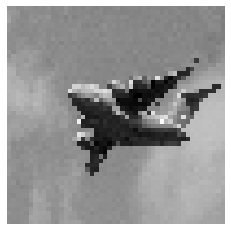

In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 이미지 크기 변경
image_50X50 = cv2.resize(image,(50,50))

# 이미지 출력
plt.imshow(image_50X50, cmap="gray"),plt.axis("off")
plt.show()

*머신러닝에서 많이 사용하는 이미지 크기는 32x32, 64x64, 96x96, 256x256*

## **8.4 이미지 자르기**



*   배열 슬라이싱을 사용해 이미지를 자를 수 있다 
*   행렬로 표현한 이미지의 남기고 싶은 행과 열을 선택하여 자른다



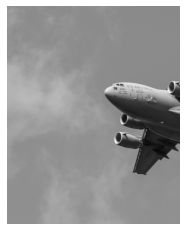

In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 열의 처음 절반과 모든 행을 선택한다.
image_cropped = image[:,:1800]

# 이미지 출력
plt.imshow(image_cropped, cmap="gray"),plt.axis("off")
plt.show()

## **8.5 이미지 흐리게 하기**



*   이미지를 흐리게 하기 위해서는 각 픽셀을 주변 픽셀의 평균값으로 변환한다
*   kernel 연산을 사용한다
* kernel의 크기는 흐림의 정도를 결정하다 (클수록 이미지가 더 부드러워짐)


---
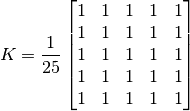

* kernel(filter)는 위와 같은 행렬을 의미한다

Flter가 적용되는 방법은
* 이미지 각 pixel에 kernel을 적용한다
* 각 pixcel에 위 kernel을 올려놓고, 그 영역안에 포함되는 값의 sum을 한 후에 25로 나눈다
* 평균으로 나온 값을 pixel에 적용한다


**OpenCV에는 4가지 형태의 blurring 방법을 제공
(1) Averaging**

blur 매소드
*Box 형태의 kernel을 이미지에 적용한 후 평균값을 box의 중심점에 적용



*   cv2.blur(img, (val,val))
*  img: 블러링 필터를 적용할 원본 이미지
* (val, val) 필터 커널 사이즈. 두 값이 달라도 무관함



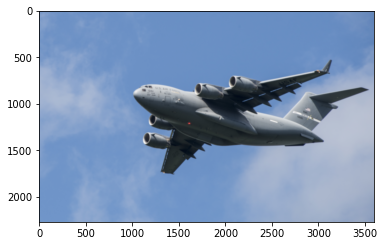

In [ ]:
# 이미지 로드
img=cv2.imread("plane.jpg")
b,g,r=cv2.split(img)
image=cv2.merge([r,g,b])

# 이미지를 흐리게 한다
image_blurry = cv2.blur(image, (10,10))

# 이미지 출력
plt.imshow(image_blurry)
plt.show()

* filter2D함수로 커널을 이미지에 직접 적용 
* 커넬의 중앙 원소가 변환되는 픽셀이고 나머지 원소가 그 픽셀의 이웃 - 미치는 영향값이 동일 하다는 점에서 유사

In [ ]:
# 커널을 만든다
kernel = np.ones((5,5)) / 25.0

# 커널을 확인
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

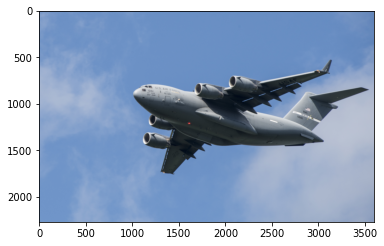

In [ ]:
# 커널을 적용
image_kernel = cv2.filter2D(image,-1,kernel)

#이미지 출력
plt.imshow(image_kernel)
plt.show()

**(2) 가우시안블러 적용** ** 가우시안 함수를 이용해서 kernel 행렬의 값을 생성하여 적용한다

* cv2.GaussianBlur(img, (val,val),0)
*(val,val) : 가우시안블러 필터. 두 개의 값이 달라도 되지만 모두 양의 홀수여야 함
* 이미지의 가우스 노이즈(전체적으로 밀도가 동일한, 백색노이즈) 를 제거하는 데 가장 효과적

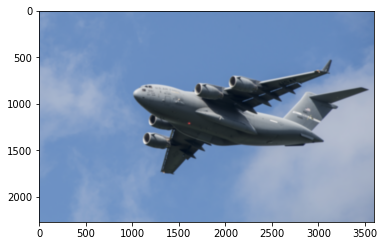

In [ ]:
# 가우시안 블러를 적용
image_very_blurry=cv2.GaussianBlur(image,(33,33),0)

# 이미지 출력
plt.imshow(image_very_blurry)
plt.show()

In [ ]:
gaus_vector=cv2.getGaussianKernel(5,0)
gaus_vector

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

In [ ]:
# 벡터를 외적하여 커널을 만듬
gaus_kernel=np.outer(gaus_vector,gaus_vector)
gaus_kernel

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

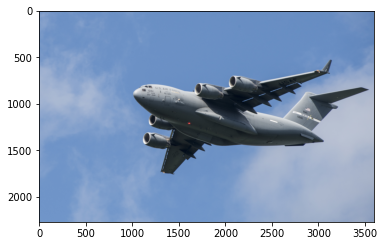

In [ ]:
# 커널을 적용
image_kernel = cv2.filter2D(image,-1,gaus_kernel)

# 이미지 출력
plt.imshow(image_kernel)
plt.show()

## **8.6 이미지 선명하게 하기**



*   중앙 픽셀을 부각하는 커널을 만든다
*  이미지의 경계선에서 대비가 더욱 두드러진다



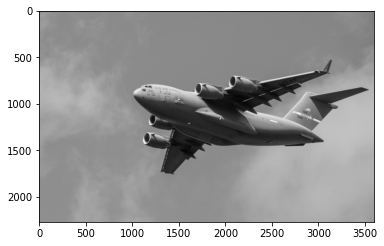

In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 커널 만듬
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# 이미지를 선명하게 만듬
image_sharp = cv2.filter2D(image,-1,kernel)

# 이미지 출력
plt.imshow(image_kernel, cmap="gray")
plt.show()

## **8.7 대비 높이기**



> 히스토그램 평활화 histogram euqalization


*   객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구
*   관심 대상 vs 다른 객체, 배경 이 잘 구분되도록 만들어줌
*   픽셀값의 범위가 커지도록 이미지를 변환





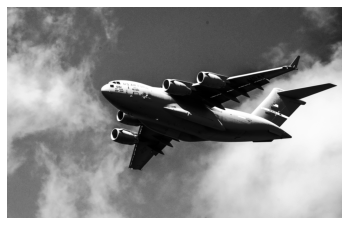

In [ ]:
# 흑백 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 흑백 이미지에는 equlizeHist 함수 바로 적용
image_enhanced = cv2.equalizeHist(image)

# 이미지 출력
plt.imshow(image_enhanced, cmap="gray"),plt.axis("off")
plt.show()

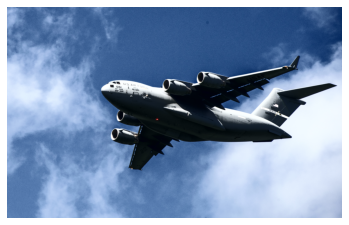

In [ ]:
# 컬러 이미지 로드
image_bgr=cv2.imread("plane.jpg",cv2.IMREAD_COLOR)

# YUV로 바꾼다
image_yuv =cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# 히스토그램 평활화를 적용
image_yuv[:,:,0]=cv2.equalizeHist(image_yuv[:,:,0])

# RGB로 바꾼다
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# 이미지 출력
plt.imshow(image_rgb),plt.axis("off")
plt.show()

RGB  빛의 3원색을 이용하여 표현함. 풍부하고 정확, 데이터가 큼

YUV 밝기와 두 색을 이용함

## 8.8 색깔 구분하기

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving adthreshold.png to adthreshold.png
Saving hue_circle.jpg to hue_circle.jpg
Saving plane.jpg to plane.jpg
Saving plane_256x256.jpg to plane_256x256.jpg
Saving saturation.jpg to saturation.jpg
Saving threshold.png to threshold.png
Saving value.jpg to value.jpg
User uploaded file "adthreshold.png" with length 172796 bytes
User uploaded file "hue_circle.jpg" with length 299788 bytes
User uploaded file "plane.jpg" with length 4937732 bytes
User uploaded file "plane_256x256.jpg" with length 22974 bytes
User uploaded file "saturation.jpg" with length 536145 bytes
User uploaded file "threshold.png" with length 568697 bytes
User uploaded file "value.jpg" with length 179240 bytes


In [215]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 이미지 데이터 ---- 픽셀이라는 작은 이미지를 직사각형 형태로 모은것
### 개별 원소(픽셀)로 이루어진 행렬의 집합
## 픽셀 ---- 단색의 직사각형
#### 강도 (intensity) 와 채널( channel) 값을 가짐
#### 강도는 0~255, 채널은 보통 R, G, B로 구성
#### 채널이 하나인 그레이 스케일 이미지는 세로픽셀 X 가로픽셀 X 1
#### 채널이 3 개인 컬러 이미지는 세로픽셀 X 가로픽셀 X 3
## 이미지 크기 ---- 세로픽셀수 X  가로픽셀수 형식으로 표현
## 색공간(color space) ---- 픽셀의 색을 숫자로 표현하는 방식

### 그레이 스케일(gray scale) 
#### 모든 색이 흑백. 각 픽셀은 명도를 나타내는 숫자로 표현
#### 0 은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 됨. 보통 0~255의 8비트 부호없는 정수로 저장됨

### RGB (Red Green Blue)
####  색은 적(Red), 녹(Green), 청(Blue) 의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현됨
#### Red는 (255, 0, 0) , Green (0, 255, 0) , Blue (0, 0, 255)
#### 픽셀데이터가 벡터 이므로 2차원 배열이 아닌 ( 세로픽셀수 X 가로픽셀수 X 색채널(channel)) 형태의 3차원 배열로 저장

### HSV ( Hue, Saturation, Value )
#### 색상(Hue) ----- 색상값 H 는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도...0 도 ~ 360 도 의 범위를 갖고 360도 와 0도는 빨강을 의미
#### 채도(Saturation) ----- 채도값 S 는 특정한 색상의 진함의 정도. 가장 진한 상태는 100% (순색, 섞임이없는색), 가장 채도가 낮은 0% 색은 무색
#### 명도(Value) ----- 명도값 V 는 밝은 정도. 명도가 높을수록 흰색에 가깝고, 명도가 낮을수록 검정색에 가까워진다

(-0.5, 1772.5, 1182.5, -0.5)

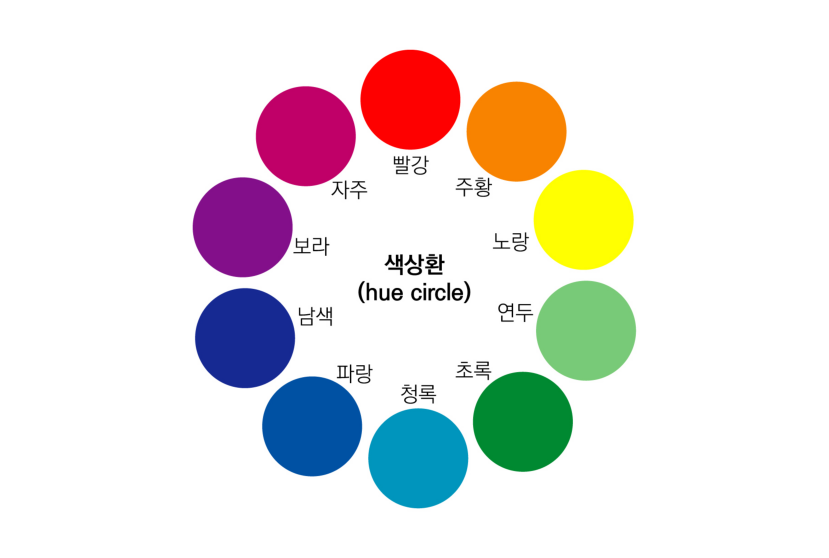

In [216]:
hue_circle = cv2.imread('hue_circle.jpg')
hue = cv2.cvtColor(hue_circle, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(hue)
plt.axis('off')


(-0.5, 1772.5, 1182.5, -0.5)

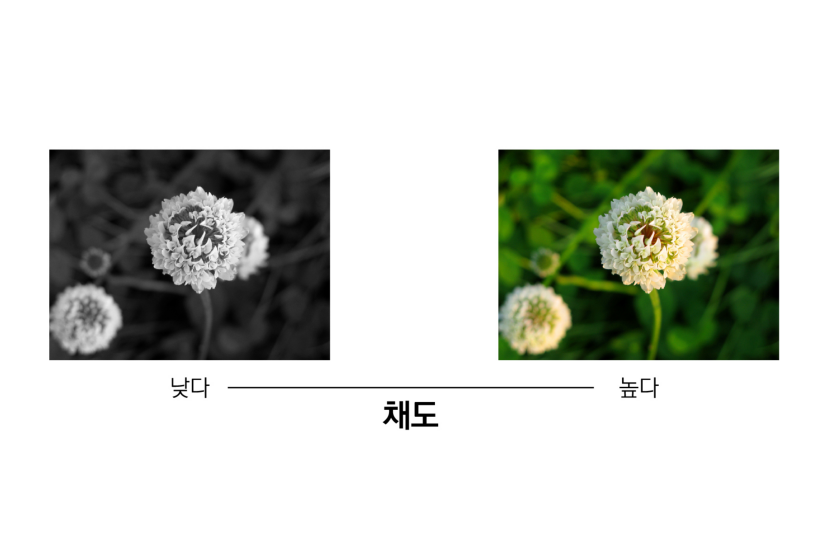

In [217]:
saturation = cv2.imread('saturation.jpg')
saturation = cv2.cvtColor(saturation, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(saturation)
plt.axis('off')

(-0.5, 1772.5, 1182.5, -0.5)

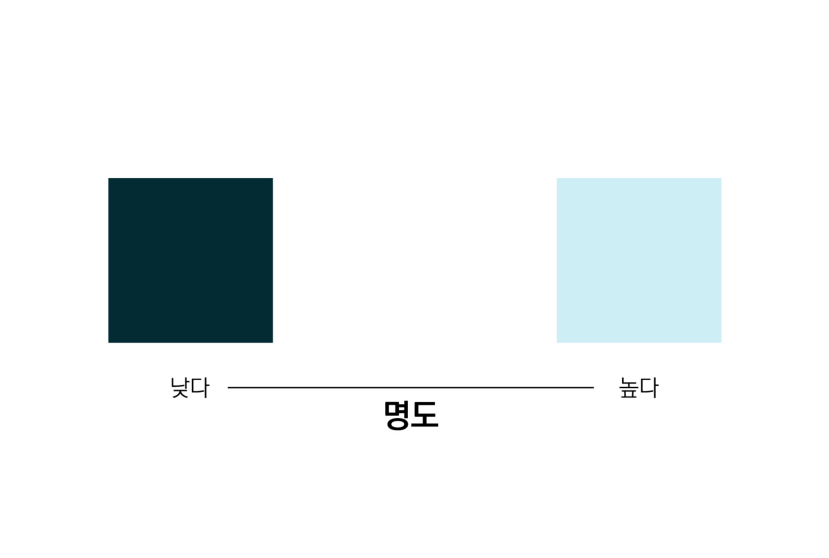

In [218]:
value = cv2.imread('value.jpg')
value = cv2.cvtColor(value, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(value)
plt.axis('off')

# 이미지에서 1개의 색깔 구분하기

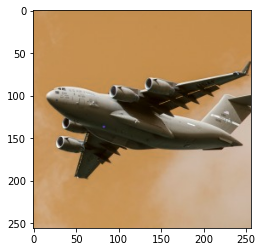

In [219]:
# 이미지를 로드하기
image_bgr = cv2.imread('plane_256x256.jpg')
plt.imshow(image_bgr)

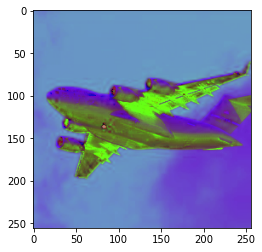

In [220]:
# BGR 에서 HSV (색상, 채도, 명도)로 변환하기
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

#### lower_blue ---- 파란색의 최저값 
#### upper_blue ---- 파란색의 최대 범위

In [221]:
# HSV 에서 파랑 값의 범위 지정
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

### 마스크란? 
#### 작업이 적용될 영역과 적용되지 않을 영역을 분리했을 때, 적용되지 않을 영역을 말하는 용어

#### 2, 3번째 파라미터에 각각 이미지 픽셀값의 최저, 최대 범위가 입력되고 첫번쨰 파라미터로 입력된 것이 그 사이 범위에 포함되는지 판단.
#### 포함되면 흰색, 나머지는 검은색으로 나타냄.

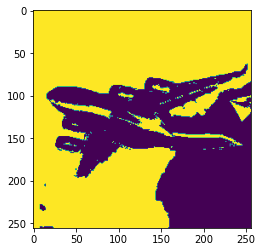

In [222]:
# 마스크 만들기
img_mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
plt.imshow(img_mask)

#### 바이너리 이미지(img_mask) 를 마스크로 사용해서 원본이미지(img_bgr) 에서 범위값(AND 연산) 에 해당하는 부분 획득

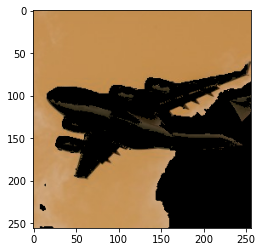

In [223]:
# 이미지에 마스크 적용하기
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=img_mask)
plt.imshow(image_bgr_masked)

### OpenCV 는 기본적으로 이미지를 BGR 타입으로 읽는데, Matplotlib 등 대부분의 이미지 라이브러리는 RGB 타입을 사용하기 때문에 BGR 을 RGB 타입으로 변경해주는것이 좋다

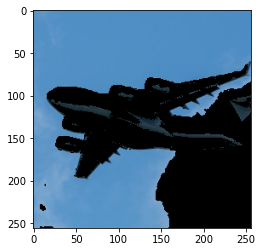

In [224]:
# BGR 에서 RGB로 변환하기
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

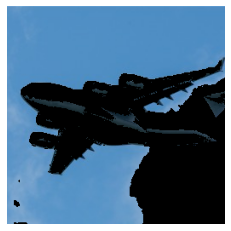

In [225]:
# 이미지 출력하기
plt.imshow(image_rgb), plt.axis('off')
plt.show()

### OpenCV 색깔 구분은 직관적
#### 1) 이미지를 HSV(색상, 채도, 명도)로 변환
#### 2) 격리시킬 값의 범위를 정의 (가장 어렵고 시간이 많이 드는 작업)
#### 3) 이미지에 적용할 마스크 만들기(마스크의 흰색영역만 유지)

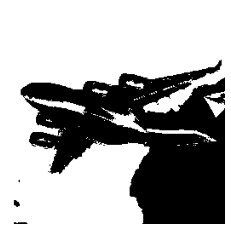

In [228]:
# 마스크 출력하기
plt.imshow(img_mask, cmap='gray'), plt.axis('off')
plt.show()

# 이미지 이진화하기(임계처리)
### 주어진 임계값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정
#### 장점 : 대부분 중요한 요소를 유지하면서 이미지의 노이즈를 제거하는 것. 
#### 예를들어 인쇄물을 찍는 사진에서 글자를 분리해내기 위해 자주 사용

### threshold( src , thresh , maxval , type)
#### src : 그레이스케일 이미지
#### thresh : 기준값
#### maxval : 기준값을 넘었을 때 적용할 최대값
#### type : 임계처리 유형
        1) THRESH_BINARY : 기준값을 넘으면 최대값 아니면 0
        2) THRESH_BINARY_INV ; 기준값을 넘으면 0 아니면 최대값 
        3) THRESH_TRUNC : 기준값을 넘으면 기준값 아니면 최대값
        4) THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0
        5) THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값





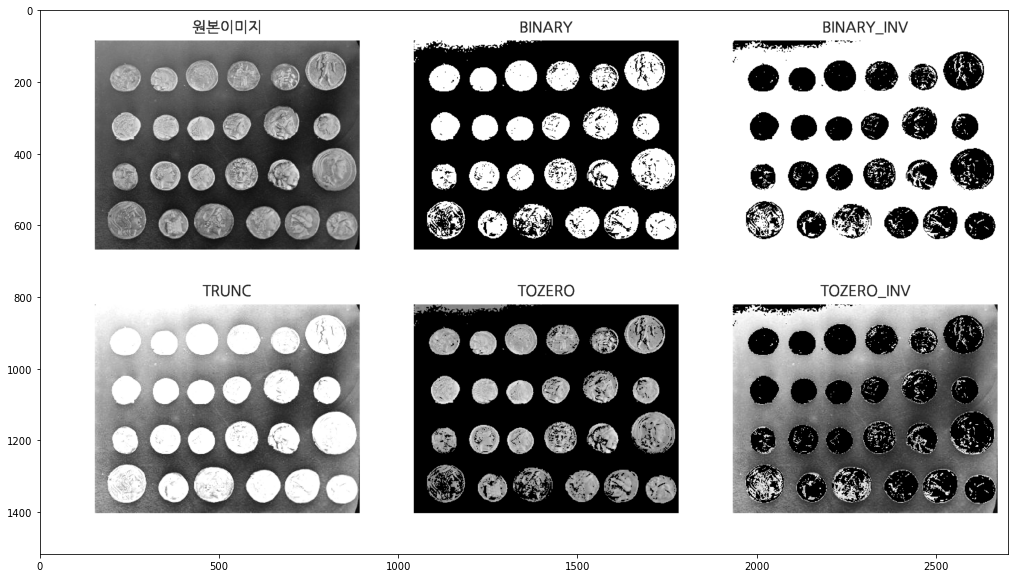

In [229]:
threshold = cv2.imread('threshold.png', cv2.IMREAD_COLOR)
threshold = cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(threshold)

# 적응적 이진화( 고급기술)
###  픽셀의 임계값이 주변 픽셀의 강도에 의해 결정
#### 이미지 안의 영역마다 빛 조건이 달라질때 도움됨

### adaptiveThreshold (src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

#### src : 그레이스케일 이미지
#### maxValue : 기준값을 넘었을 때 적용할 값
#### adaptiveMethod : 영역 내에서 기준값을 계산하는 방법.
        1) ADAPTIVE_THRESH_MEAN_C: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용
        2) ADAPTIVE_THRESH_GAUSSIAN_C: 영역에 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용
#### thresholdType : 임계처리 유형
        1) THRESH_BINARY
        2) THRESH_BINARY_INV
#### blockSize : 임계처리를 적용할 영역의 크기
#### C : 평균이나 가중평균에서 차감할 값

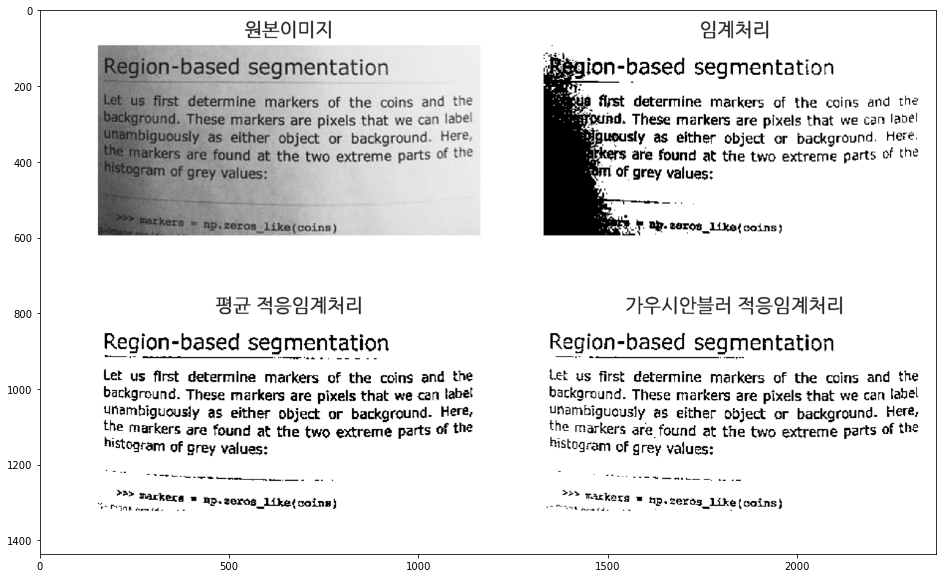

In [230]:
adthreshold = cv2.imread('adthreshold.png', cv2.IMREAD_COLOR)
adthreshold = cv2.cvtColor(adthreshold, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(adthreshold)

In [171]:
image_grey = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

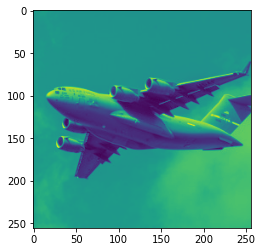

In [172]:
plt.imshow(image_grey)

In [180]:
# max_output_value = 출력 픽셀 강도의 최대값
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
# cv2.ADAPTIVE_THRESH_GAU
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        #cv2.ADAPTIVE_THRESH_GAUSSIAN_C = 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정
                                        # 여기서 가중치는 가우시안 윈도우에 의해 결정됨
                                        # cv2.ADAPTIVE_THRESH_MEAN_C 로 주변 픽셀의 평균을 임계값으로 설정 가능
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

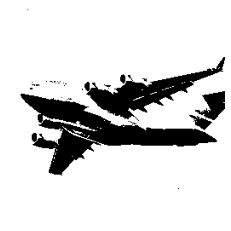

In [181]:
plt.imshow(image_binarized, cmap='gray'), plt.axis('off')
plt.show()

## cv2.ADAPTIVE_THRESH_MEAN_C 적용해보기

In [182]:
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        # neighborhood_size = 블록 크기(픽셀의 임계값 결정에 사용하는 주변 영역의 크기)
                                        neighborhood_size,
                                        # subtract_from_mean = 계산된 임계값에서 뺄 상수(임계값을 수동으로 미세 조정하는데 사용)
                                        subtract_from_mean)

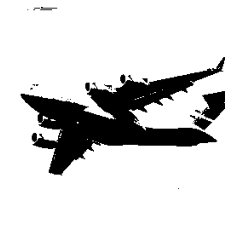

In [183]:
plt.imshow(image_mean_threshold, cmap='gray'), plt.axis('off')
plt.show()

# 배경 제거하기 (이미지의 전경만 분리해내기)

In [231]:
# 이미지를 로드하고 RGB로 변환하기
image_bgr = cv2.imread('plane_256x256.jpg')

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [232]:
# 사각형의 좌표: 시작점의 x, 시작점의 y, 너비, 높이
rectangle = (0, 56, 256, 150)

In [246]:
# 초기 마스크 만들기
mask = np.zeros(image_rgb.shape[:2], np.uint8)

In [247]:
mask[100:130]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [234]:
# grabCut에 사용할 임시 배열을 만들기
# 1 행, 65열
# datatype default 값이 np.float64
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

In [235]:
bgdModel

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [249]:
# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
            mask, # 마스크
            rectangle, # 사각형
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            5, # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 3.57471979e-01,  1.17357108e-01,  2.96736032e-01,
          1.42131545e-01,  8.63033368e-02,  7.96381295e+01,
          1.42459652e+02,  1.96167326e+02,  1.57068846e+02,
          1.80021183e+02,  2.04987765e+02,  8.73091145e+01,
          1.47114112e+02,  1.98076918e+02,  1.06276387e+02,
          1.55257539e+02,  1.99118667e+02,  1.40276881e+02,
          1.71762354e+02,  2.02411969e+02,  3.05466125e+00,
          1.81267753e+00,  1.59430339e+00,  1.81267753e+00,
          1.52079412e+00,  1.23717689e+00,  1.59430339e+00,
          1.23717689e+00,  1.17350076e+00,  3.55056693e+01,
          1.54477746e+01,  4.05051364e+00,  1.54477746e+01,
          7.48165499e+00,  2.19730082e+00,  4.05051364e+00,
          2.19730082e+00,  2.51391166e+00,  3.05037549

In [250]:
mask[100:130]

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]], dtype=uint8)

In [194]:
# 배경인 곳은 0, 그외에는 1로 설정한 마스크 만들기
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

In [245]:
mask_2[100:140]

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [195]:
# 이미지에 새로운 마스크를 곱해 배경을 제외하기
image_rgb_nobg = image_rgb * mask_2[:,:,np.newaxis]

(<matplotlib.image.AxesImage at 0x1bdb90f7250>, (-0.5, 255.5, 255.5, -0.5))

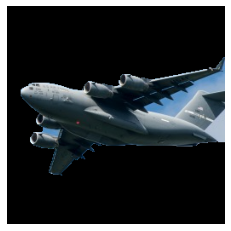

In [196]:
plt.imshow(image_rgb_nobg),plt.axis('off')

## 그랩컷이 잘 작동해도 여전히 이미지에 남은 배경이 있다.
### 하나씩 지정해서 지울수있지만 실무에서 수천장을 고치는건 불가능하기 때문에 이미지에 일부 배경이 남아있는것을 수용하자

### 1) 먼저 전경(비행기)이 들어있는 영역 주위를 사각형을 표시
### 2) 그랩컷은 이 사각형 밖에 있는 모든 것이 배경이라고 가정하고 이 정보를 사용해 사각형 안의 배경을 찾음
### 3) 그 다음 배경과 전경 영역을 구분할 수 있는 마스크 제작

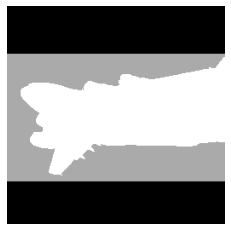

In [197]:
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

### 4) 검은 영역은 배경이라고 확실하게 가정한 사각형의 바깥쪽 영역
### 5) 회색 영역은 그랩컷이 배경이라고 생각하는 영역
### 6) 흰색 영역은 전경
### 7) 이 마스크를 사용해서 검은영역과 회색 영역을 합친 두번째 마스크 제작
### 8) 두번째 마스크를 이미지에 적용하고 전경만 남긴다

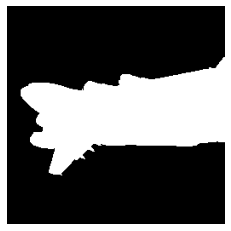

In [198]:
plt.imshow(mask_2, cmap='gray'), plt.axis('off')
plt.show()

# 경계선 감지하기 (이미지에 있는 경계선 찾기)
## 경계선은 많은 정보가 담긴 영역. 중요함.
### 하늘 배경에 비행기가 나타났을 때, 경계선 감지를 통해 물체의 형태도 알수있고 정보가 적은 영역은 제거하고 대부분의 정보가 담긴 이미지 영역 구분 가능
### 캐니 경계선 감지기 사용.
#### 그레디언트(gradient) 임계값의 저점과 고점을 나타내는 두 매개변수 필요
#### 낮음 임계값과 높은 임계값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주
#### 높은 임계값보다 큰 픽셀은 강한 경계선 픽셀로 간주

In [200]:
# 흑백 이미지 로드
image_gray = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [201]:
# 픽셀 강도의 중간값 계산하기
median_intensity = np.median(image_gray)

In [202]:
# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정하기
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0+0.33) * median_intensity))

### canny = cv2.Canny (원본 이미지, 임계값 1, 임계값2, 커널크기(aperture size), L2그라디언트)
#### 임계값 1 (threshold 1) = 임계값 1 이하에 포함된 가장자리는 가장자리에서 제외
#### 임계값 2 (threshold 2) = 임계값 2 이상에 포함된 가장자리는 가장자리로 간주
#### 커널 크기(aperture size) = sobel 마스크의 aperture size, 자동으로 할당
#### L2 gradient = L2 방식의 사용 유무, default 값은 L1 gradient

In [203]:
# 캐니 경계선 감지기를 적용하기
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

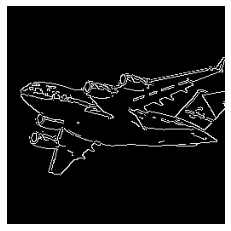

In [204]:
# 이미지 출력하기
plt.imshow(image_canny, cmap='gray'), plt.axis('off')
plt.show()

# 모서리 감지하기
## 해리스 모서리 감지기
### 두 개의 경계선이 교차하는 지점을 감지하는 방법
#### 윈도(이웃이나 패치) 안의 픽셀이 작은 움직임에도 크게 변하는 윈도를 찾는것

In [253]:
# 흑백 이미지 로드하기
image_bgr = cv2.imread('plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

### block_size = 각 픽셀에서 모서리 감지에 사용되는 이웃 픽셀 크기
### aperture = 사용하는 sobel 커널 크기
### free_parameter = 값이 클수록 부드러운 모소리를 구별

In [254]:
# 모서리 감지 매개변수 설정하기
block_size = 2
aperture = 29
free_parameter = 0.04

In [255]:
# 모서리 감지하기
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

In [256]:
# 모서리 표시 부각하기
detector_responses = cv2.dilate(detector_responses, None)

In [257]:
# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시하기
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

In [258]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

(<matplotlib.image.AxesImage at 0x1bdd0c98dc0>, (-0.5, 255.5, 255.5, -0.5))

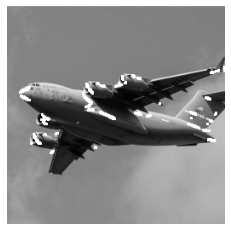

In [259]:

plt.imshow(image_gray, cmap="gray"), plt.axis("off")

(<matplotlib.image.AxesImage at 0x2534c005400>, (-0.5, 255.5, 255.5, -0.5))

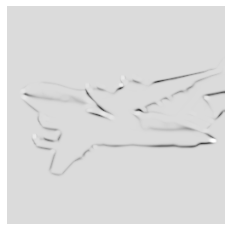

In [9]:
plt.imshow(detector_responses, cmap='gray'),plt.axis('off')

# Shi-Tomasi 모서리 감지기(goodFeaturesToTrack)
## 뚜렷하게 나타난 모서리를 지정된 개수만큼 찾을 수 있음

### corners_to_detect = 감지할 모서리 개수
### minimum_quality_score = 모서리가 될 최소 품질 (0에서 1 사이)
### minimum_distance = 모서리 사이의 최소 유클리드 거리

In [264]:
# 이미지 로드
image_bgr = cv2.imread('plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

In [261]:
# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

In [265]:
# 모서리 감지
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)

In [266]:
corners=np.float32(corners)

In [267]:
#모서리마다 흰원 그리기
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

<ipython-input-267-5d126cf2cd3b>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)


In [268]:
# 흑백 이미지로 변환하기
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

(<matplotlib.image.AxesImage at 0x1bdcf1eaa00>, (-0.5, 255.5, 255.5, -0.5))

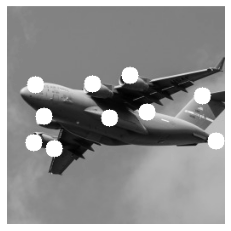

In [269]:
plt.imshow(image_rgb, cmap='gray'),plt.axis('off')

# 이미지를 머신러닝에 필요한 샘플로 변환하기 

In [273]:
# 흑백 이미지 로드
image = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [274]:
image

array([[152, 150, 149, ..., 142, 142, 142],
       [137, 135, 134, ..., 128, 127, 127],
       [135, 133, 133, ..., 127, 126, 126],
       ...,
       [150, 150, 151, ..., 168, 167, 167],
       [151, 151, 152, ..., 167, 166, 166],
       [152, 152, 153, ..., 167, 166, 166]], dtype=uint8)

In [275]:
# 이미지를 10 x 10 픽셀 크기로 변환
image_10x10 = cv2.resize(image, (10,10))

In [276]:
image_10x10

array([[133, 130, 130, 129, 130, 129, 129, 128, 128, 127],
       [135, 131, 131, 131, 130, 130, 129, 128, 128, 128],
       [134, 132, 131, 131, 130, 129, 129, 128, 130, 133],
       [132, 158, 130, 133, 130,  46,  97,  26, 132, 143],
       [141,  36,  54,  91,   9,   9,  49, 144, 179,  41],
       [142,  95,  32,  36,  29,  43, 113, 141, 179, 187],
       [141, 124,  26,  25, 132, 135, 151, 175, 174, 184],
       [143, 151,  38, 133, 134, 139, 174, 177, 169, 174],
       [155, 141, 135, 137, 137, 152, 169, 168, 168, 179],
       [152, 139, 136, 135, 137, 143, 159, 166, 171, 175]], dtype=uint8)

In [7]:
# 이미지 데이터를 1차원 벡터로 변환
image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

## 이미지는 픽셀 격자로 표현
### 흑백일 때 각 픽셀은 하나의 값으로 표현됨 ( 픽셀 강도가 흰색이면 1, 검정이면 0 )

(<matplotlib.image.AxesImage at 0x1bda6868d90>, (-0.5, 9.5, 9.5, -0.5))

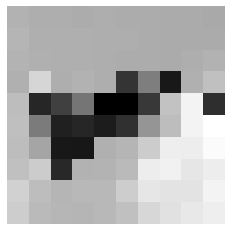

In [8]:
plt.imshow(image_10x10, cmap='gray'), plt.axis('off')

In [9]:
image_10x10.shape

(10, 10)

In [10]:
image_10x10.flatten().shape

(100,)

### 컬러 이미지일땐 각 픽셀이 여러개의 값( 보통 3개)로 표현
#### 채널(빨강,초록,파랑 등)을 나타내는 각 값이 합쳐져서 최종 색 만듦 (10x10 크기 컬러 이미지는 샘플마다 300개의 특성값 존재)

In [277]:
# 컬러 이미지 로드
image_color = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

In [278]:
# 이미지를 10x10 픽셀 크기로 변환
image_color_10x10 = cv2.resize(image_color, (10,10))

In [279]:
image_color_10x10

array([[[197, 145,  85],
        [196, 143,  80],
        [196, 143,  80],
        [195, 142,  79],
        [197, 143,  80],
        [196, 142,  79],
        [196, 142,  79],
        [195, 141,  78],
        [195, 141,  78],
        [194, 140,  77]],

       [[199, 146,  89],
        [197, 144,  81],
        [197, 144,  81],
        [197, 144,  81],
        [197, 143,  80],
        [197, 143,  80],
        [196, 142,  79],
        [195, 141,  78],
        [195, 141,  78],
        [195, 141,  78]],

       [[198, 146,  86],
        [198, 144,  83],
        [197, 144,  81],
        [197, 144,  81],
        [196, 143,  80],
        [196, 143,  77],
        [196, 142,  79],
        [195, 141,  78],
        [195, 143,  82],
        [194, 147,  84]],

       [[198, 145,  82],
        [199, 166, 126],
        [197, 144,  77],
        [199, 146,  84],
        [186, 139,  89],
        [ 58,  52,  31],
        [109, 100,  88],
        [ 32,  28,  18],
        [174, 139, 103],
        [196, 152, 

In [280]:
image_color_10x10.shape

(10, 10, 3)

In [281]:
image_color_10x10.flatten()

array([197, 145,  85, 196, 143,  80, 196, 143,  80, 195, 142,  79, 197,
       143,  80, 196, 142,  79, 196, 142,  79, 195, 141,  78, 195, 141,
        78, 194, 140,  77, 199, 146,  89, 197, 144,  81, 197, 144,  81,
       197, 144,  81, 197, 143,  80, 197, 143,  80, 196, 142,  79, 195,
       141,  78, 195, 141,  78, 195, 141,  78, 198, 146,  86, 198, 144,
        83, 197, 144,  81, 197, 144,  81, 196, 143,  80, 196, 143,  77,
       196, 142,  79, 195, 141,  78, 195, 143,  82, 194, 147,  84, 198,
       145,  82, 199, 166, 126, 197, 144,  77, 199, 146,  84, 186, 139,
        89,  58,  52,  31, 109, 100,  88,  32,  28,  18, 174, 139, 103,
       196, 152, 105, 201, 151,  97,  47,  41,  21,  68,  59,  39, 103,
        94,  81,  24,  12,   0,  23,  12,   0,  87,  56,  22, 199, 154,
       102, 183, 180, 173,  57,  46,  26, 200, 153, 100, 134, 106,  59,
        40,  36,  23,  40,  41,  23,  34,  34,  18,  53,  47,  29, 124,
       118,  99, 152, 145, 127, 190, 182, 169, 206, 190, 174, 20

In [212]:
image_color_10x10.flatten().shape

(300,)

(<matplotlib.image.AxesImage at 0x1bdb91217c0>, (-0.5, 9.5, 9.5, -0.5))

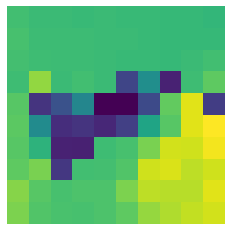

In [214]:
plt.imshow(image_10x10), plt.axis('off')

## 이미지 처리의 어려움 ---- 이미지 모든 픽셀이 특성이 되기 때문에 이미지가 커질수록 특성의 개수도 늘어남

In [28]:
# 흑백 이미지 로드
image_256x256_gray = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [33]:
image_256x256_gray

array([[152, 150, 149, ..., 142, 142, 142],
       [137, 135, 134, ..., 128, 127, 127],
       [135, 133, 133, ..., 127, 126, 126],
       ...,
       [150, 150, 151, ..., 168, 167, 167],
       [151, 151, 152, ..., 167, 166, 166],
       [152, 152, 153, ..., 167, 166, 166]], dtype=uint8)

In [31]:
image_256x256_gray.flatten()

array([152, 150, 149, ..., 167, 166, 166], dtype=uint8)

In [29]:
# 이미지 데이터를 1차원 벡터로 변환하고 차원 출력
image_256x256_gray.flatten().shape

(65536,)

In [34]:
# 컬러 이미지 로드
image_256x256_color = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

In [35]:
image_256x256_color

array([[[212, 163, 107],
        [210, 161, 105],
        [209, 159, 106],
        ...,
        [208, 154,  93],
        [208, 154,  93],
        [208, 154,  93]],

       [[197, 148,  92],
        [195, 146,  90],
        [194, 144,  91],
        ...,
        [194, 140,  79],
        [193, 139,  78],
        [193, 139,  78]],

       [[195, 146,  90],
        [193, 144,  88],
        [193, 144,  88],
        ...,
        [193, 139,  78],
        [192, 138,  77],
        [192, 138,  77]],

       ...,

       [[205, 160, 109],
        [205, 160, 109],
        [204, 161, 112],
        ...,
        [198, 174, 146],
        [197, 173, 145],
        [197, 173, 145]],

       [[206, 161, 110],
        [206, 161, 110],
        [205, 162, 113],
        ...,
        [199, 172, 145],
        [198, 171, 144],
        [198, 171, 144]],

       [[207, 162, 111],
        [207, 162, 111],
        [206, 163, 114],
        ...,
        [199, 172, 145],
        [198, 171, 144],
        [198, 171, 144]]

In [36]:
image_256x256_color.flatten()

array([212, 163, 107, ..., 198, 171, 144], dtype=uint8)

In [37]:
image_256x256_color.flatten().shape

(196608,)

# 평균 색을 특성으로 인코딩하기
### 빨강,초록,파랑 채널의 평균값을 계산하여 이미지의 평균 컬러를 나타내는 3개의 컬러 특성 만들기

In [282]:
# BGR 이미지로 로드
image_bgr = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

In [283]:
image_bgr.shape

(256, 256, 3)

In [284]:
# 각 채널의 평균 계산
channels = cv2.mean(image_bgr)

In [75]:
channels

(169.0235595703125, 133.11940002441406, 90.52377319335938, 0.0)

In [81]:
# 파랑과 빨강 바꾸기 (BGR 에서 RGB로 만들기)
observation = np.array([(channels[2], channels[1], channels[0])])

In [82]:
# 채널 평균값 확인
observation

array([[ 90.52377319, 133.11940002, 169.02355957]])

In [83]:
observation.shape

(1, 3)

(-0.5, 2.5, 0.5, -0.5)

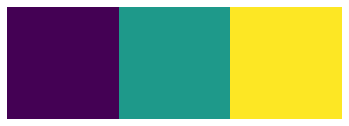

In [88]:
plt.imshow(observation)
plt.axis('off')

# 컬러 히스토그램을 특성으로 인코딩하기
### 이미지에 나타난 컬러를 표현하는 일련의 특성 만들기

In [109]:
# 이미지 로드
image_bgr = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

In [110]:
# RGB 로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [111]:
# 특성값을 담을 리스트 만들기
features = []

### cv2.calcHist(img, channel, mask, histSize, range)

In [121]:
# 각 컬러 채널에 대해 히스토그램 계산
colors = ('r','g','b')

#각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가하기
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],  #이미지
                              [i],  #채널 인덱스
                              None,  # 마스크 없음(이미지 전체에 대한 히스토그램)
                              [256],  # 히스토그램 크기, BIN 개수
                              [0, 256])  #픽셀값 범위
    features.extend(histogram)

In [113]:
# 샘플의 특성값으로 벡터를 만들기
observation = np.array(features).flatten()

In [114]:
observation[0:5]

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

###  히스토그램은 데이터에서 값의 분포를 나타냄

In [116]:
import pandas as pd

In [117]:
data = pd.Series([1,1,2,2,3,3,3,4,5])

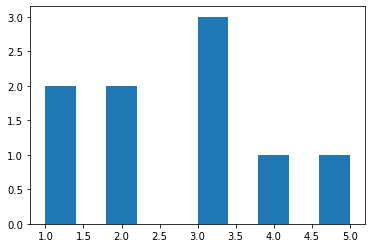

In [118]:
data.hist(grid=False)
plt.show()

#### 히스토그램의 막대는 데이터에 등장한 각 값의 개수를 나타냄 

### 각 컬러채널에도 히스토그램 적용가능
#### 256개의 값으로 표현됨(채널에 가능한 값의 범위)
#### x축은 가능한 256개의 채널값을 나타냄, y축은 이미지의 모든 픽셀에서 나타난 특정 채널값의 횟수

In [125]:
# 각 컬러 채널에 대한 히스토그램 계산
colors = ('r','g','b')

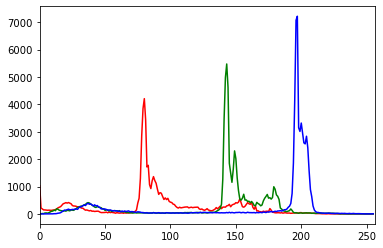

In [126]:
# 컬러 채널을 반복하면서 히스토그램을 계산하고 그래프 그리기
for i , channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],  #이미지
                             [i],  #채널 인덱스
                             None, # 마스크 없음
                             [256],  #히스토그램 크기
                             [0,256])  # 범위
    plt.plot(histogram, color=channel)
    plt.xlim([0,256])
    
plt.show()

### 컬러 채널마다 256개의 특성, 하나의 이미지에서 컬러 분포를 표현하는 768개의 특성 만들수 있다